In [ ]:
# In this code, we will attempt to run MNIST backwards, i.e. given a number, the neural net will output the image of that number.

In [ ]:
#Import packages

import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt
from Dense import Dense
from Activations import Tanh, ReLu, Sigmoid, Softmax, Binary
from Losses import mse, mse_prime
from Network import train, predict
from Visualize import visualize_network


In [43]:
def preprocess_data(x, y, limit):
    # reshape and normalize input data
    x = x.reshape(x.shape[0], 28 * 28, 1)
    x = x.astype("float32") / 255
    # encode output which is a number in range [0,9] into a vector of size 10
    # e.g. number 3 will become [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
    y = np_utils.to_categorical(y)
    y = y.reshape(y.shape[0], 10, 1)
    
    return x[:limit], y[:limit]


# load MNIST from server
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, y_train = preprocess_data(x_train, y_train, 60000)
x_test, y_test = preprocess_data(x_test, y_test, 1000)
#For the moment, we attempt to take just two images from the dataset, and see if we can get the neural net to output the correct image.


# neural network
network = [
    Dense(10, 28 * 28),
    Sigmoid()
]


In [46]:
learning_rates = [0.01]
for i in range(1):
    costs = train(network, mse, mse_prime, y_train, x_train, epochs=100, batch_size = 1, learning_rate=1)
    y = np.zeros((10,10,1))
    




1/100, error=0.0534770963749734
2/100, error=0.053471705866881936
3/100, error=0.053465531512807835
4/100, error=0.05345917554993634
5/100, error=0.05345288848892162
6/100, error=0.0534474783997354
7/100, error=0.0534432857692256
8/100, error=0.053439858478781396
9/100, error=0.05343676106163408
10/100, error=0.05343377931052117
11/100, error=0.05343080004560329
12/100, error=0.053427724835867864
13/100, error=0.05342442997800608
14/100, error=0.05342077920524142
15/100, error=0.053416801878615534
16/100, error=0.053412976097338985
17/100, error=0.053409805206579654
18/100, error=0.05340722443587921
19/100, error=0.05340499742351611
20/100, error=0.05340299198487879
21/100, error=0.053401145887931926
22/100, error=0.053399426527634596
23/100, error=0.05339781414034331
24/100, error=0.05339629441066537
25/100, error=0.05339485530573665
26/100, error=0.05339348621028674
27/100, error=0.05339217802295632
28/100, error=0.05339092331629595
29/100, error=0.05338971624273184
30/100, error=0.0

KeyboardInterrupt: 

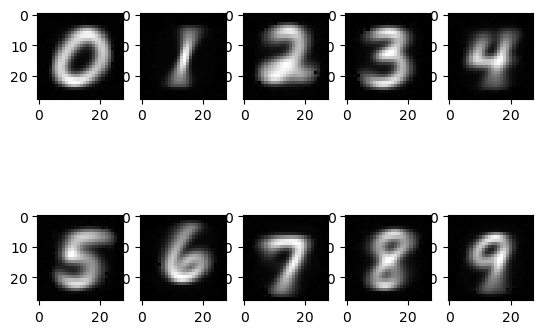

In [50]:
# Visualize each digit, feeding the network with the number and visualizing the output

#make a y for each digit
y = np.zeros((10,10,1))
for i in range(10):
    y[i][i] = 1

# Visualize each digit, feeding the network with the number and visualizing the output
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(predict(network, y[i]).reshape(28, 28), cmap="gray")


